# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

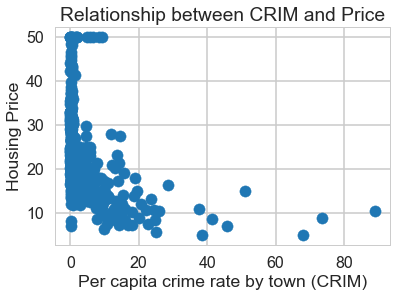

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

## Part 2 Checkup Exercise Set I

**Exercise:**
What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?

**Exercise:**
Create scatter plots between RM and PRICE, and PTRATIO and PRICE. Label your axes appropriately using human readable labels. Tell a story about what you see.

**Exercise:**
What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and PRICE (house price) and tell a story about what you see.

#your turn: describe relationship

The relationship between housing price and crime rate are negatively correlated; areas with higher crime rate tend to have lower housing price. The chart is overly skewed towards 0 or very low crime rate so the relationship may be non-linear. We can examine the relationship again by taking log of CRIM. We may also need to normalize the data before building the linear regression model.

Text(0.5,1,'Relationship between RM and Price')

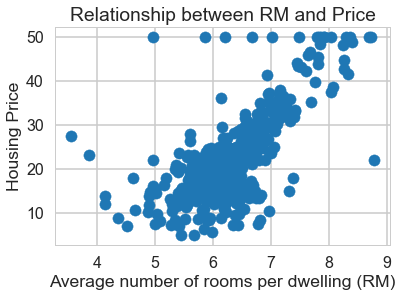

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

The relationship between housing price and RM is linear and positively correlated; houses with higher number of rooms tend to have higher price. There are a few outliner that have high median housing price but has RM below the average, and also above average RM with median housing price around $20k.

Text(0.5,1,'Relationship between PTRATIO and Price')

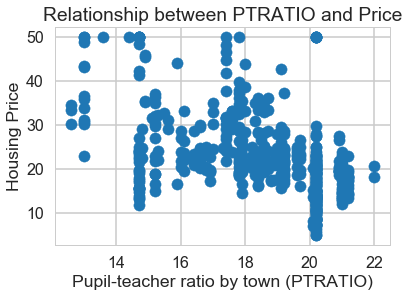

In [15]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

The relationship between pupil-teacher ratio and housing price is less obvious. Majority of houses with PT ration above 20 have median housing price below 30k. Whereas a large portion of data points with median housing price above 30k have PT ratio below 18. The relationship is somewhat linear. We can see there is an outlier with PT ratio about 20 and median housing price around 50k.

Text(0.5,1,'Relationship between DIS and Price')

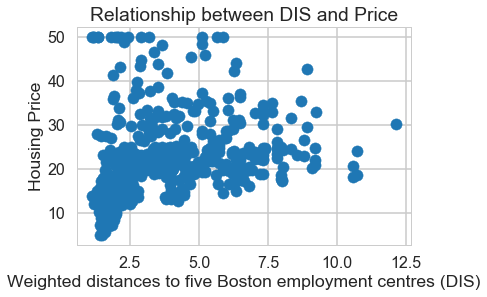

In [16]:
# your turn: create some other scatter plots
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Weighted distances to five Boston employment centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

There is no linear relationship between DIS and Price. The housing price does not shift along the spread of distance to employment centers. The only thing that is recognizable is that there tend to be less variance in price as distance increase.

Text(0.5,1,'Relationship between B and Price')

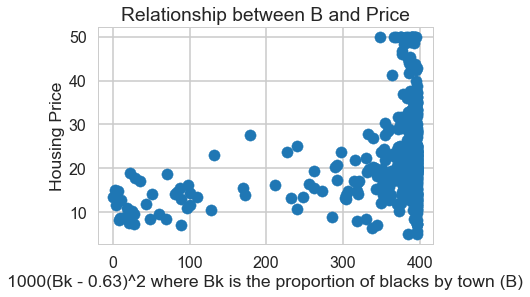

In [17]:
plt.scatter(bos.B, bos.PRICE)
plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (B)")
plt.ylabel("Housing Price")
plt.title("Relationship between B and Price")

The relationship between B and Price is non-linear, this could be because of B has parabolic relationship with the proportion of blacks by town. The relationship between B and Bk can be seen below. Towns with significant proportion of African American population, in this case 20% or greater, would have B value below 200. Towns with proportion of African American population below 20%, the B value would be greater than 200. As we can see, housing price tend to be higher in locations with low proportion of African American population.

Text(0.5,1,'Relationship between Bk and B')

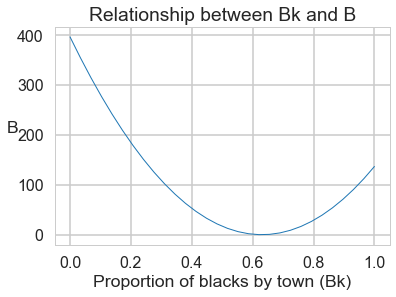

In [22]:
B_x = np.linspace(0, 1, 30)
B_y = 1000*(B_x-0.63)**2
plt.plot(B_x,B_y, linewidth=1.0)
plt.xlabel('Proportion of blacks by town (Bk)')
plt.ylabel('B', rotation=0)
plt.title("Relationship between Bk and B")

Text(0.5,1,'Relationship between LSTAT and Price')

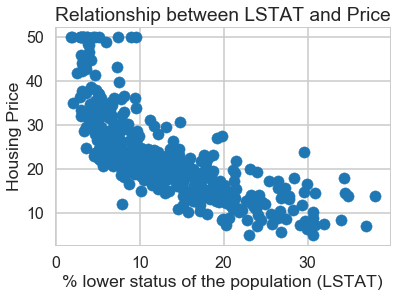

In [18]:
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

LSTAT and Price have logarithmic relationship. The housing price decreases with increasing proportion of lower status population. 

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

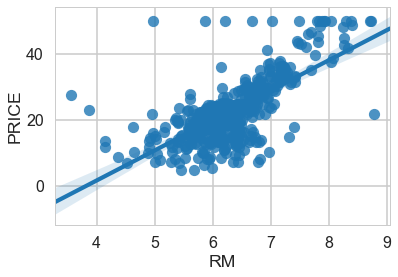

In [23]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


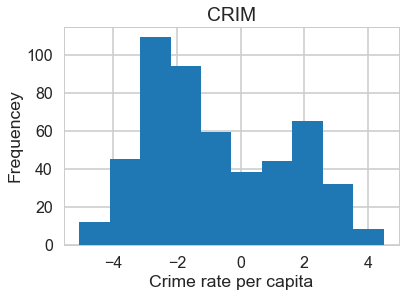

In [24]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

## Part 2 Checkup Exercise Set II

**Exercise:**
In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

**Exercise:**
Plot histograms for RM and PTRATIO, along with the two variables you picked in the previous section.

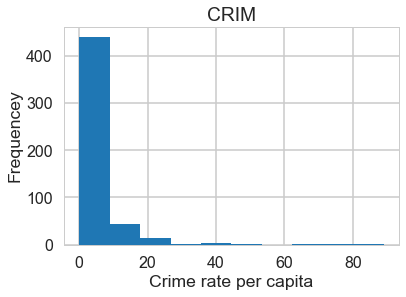

In [25]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

Text(0.5,1,'Relationship between log(CRIM) and Price')

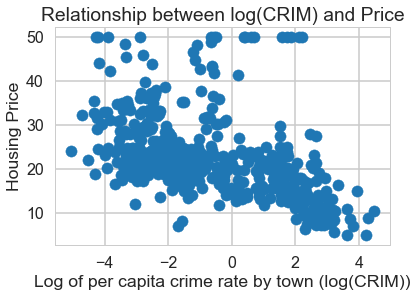

In [29]:
plt.scatter(np.log(bos.CRIM), bos.PRICE)
plt.xlabel("Log of per capita crime rate by town (log(CRIM))")
plt.ylabel("Housing Price")
plt.title("Relationship between log(CRIM) and Price")

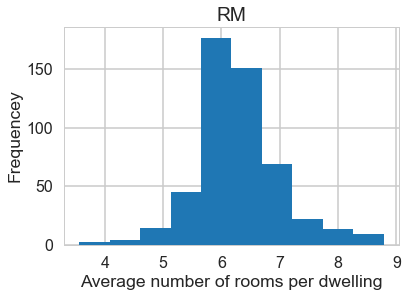

In [30]:
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Frequencey")
plt.show()

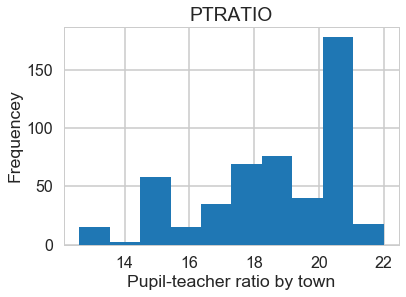

In [32]:
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Frequencey")
plt.show()

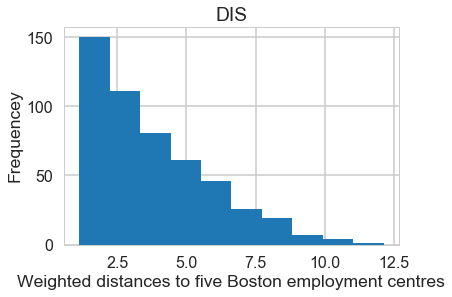

In [33]:
plt.hist(bos.DIS)
plt.title("DIS")
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Frequencey")
plt.show()

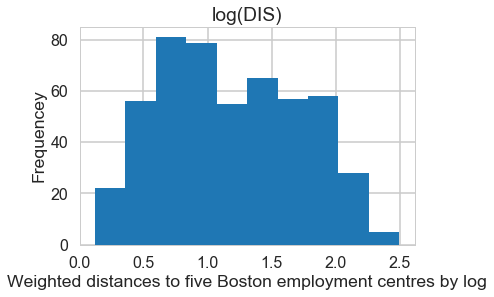

In [35]:
plt.hist(np.log(bos.DIS))
plt.title("log(DIS)")
plt.xlabel("Weighted distances to five Boston employment centres by log")
plt.ylabel("Frequencey")
plt.show()

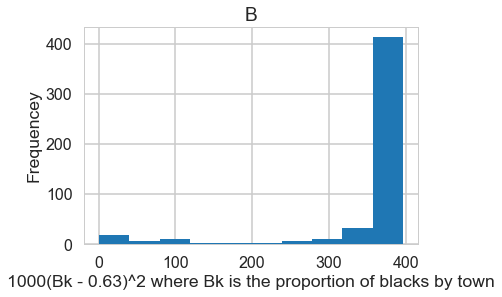

In [34]:
plt.hist(bos.B)
plt.title("B")
plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
plt.ylabel("Frequencey")
plt.show()

The histogram of B, 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town, is extremely skewed to the right. We can fix this by doing the opposite of taking log of the data, by exponentiation. By transferring B to the exponent with base e. The result is shown below, which reveals polarized distribution of frequency on both sides. This distribution is somewhat similar to the distribution of Bk represented by the line graph in exercise set 1.

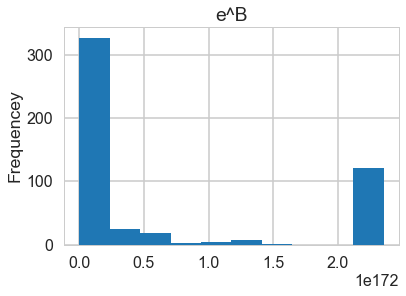

In [51]:
plt.hist(np.exp(bos.B))
plt.title("e^B")
#plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
plt.ylabel("Frequencey")
plt.show()

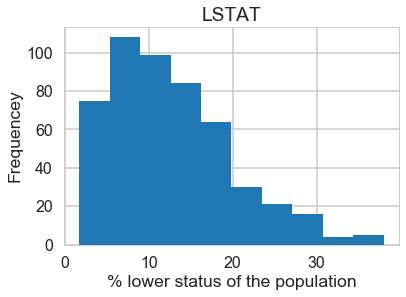

In [52]:
plt.hist(bos.LSTAT)
plt.title("LSTAT")
plt.xlabel("% lower status of the population")
plt.ylabel("Frequencey")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [53]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/chinghan75/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [54]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 29 Mar 2018   Prob (F-statistic):           2.49e-74
Time:                        11:29:57   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

## Part 3 Checkup Exercise Set I

**Exercise:**
Create a scatterplot between the predicted prices, available in m.fittedvalues (where m is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.

Text(0.5,1,'Predicted Price and Original Price')

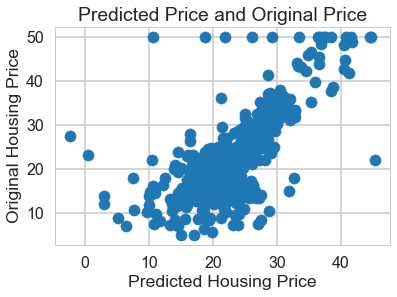

In [55]:
# your turn
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel("Predicted Housing Price")
plt.ylabel("Original Housing Price")
plt.title("Predicted Price and Original Price")

The scatterplot between the predicted and original prices have the same pattern as the plot between RM and PRICE. This could be because only the β of RM is used to predict the house price so it would have the same distribution as RM. The scatterplot between RM and PRICE below can be compared to the plot above. 

Text(0.5,1,'Relationship between RM and Price')

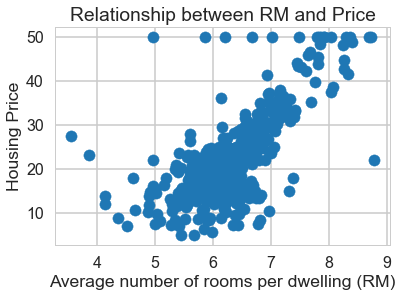

In [56]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

In [100]:
#let's fit all 13 features into the OLS
m_all = ols('PRICE ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',bos).fit()
print(m_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 30 Mar 2018   Prob (F-statistic):          6.95e-135
Time:                        13:51:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

Text(0.5,1,'Relationship between Predicted and True Price')

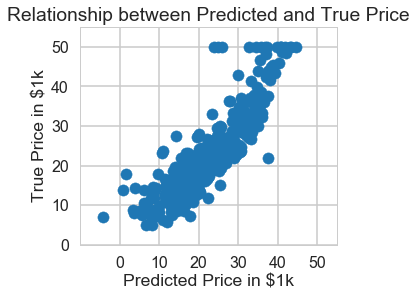

In [101]:
plt.scatter(m_all.fittedvalues, bos.PRICE)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-10, 55)
plt.ylim(0, 55)
plt.xticks(np.arange(0, 55, step=10))
plt.xlabel("Predicted Price in $1k")
plt.ylabel("True Price in $1k")
plt.title("Relationship between Predicted and True Price")

The predicted price had true housing price has almost linear relationship of 1 from the origin in the range of 0 to 40k. However, the linear relationship disappeared when housing price go above 40k and true price tend to be higher than predicted price beyond that point. One hypothesis could be that the evaluation of housing beyond 40k may be based on different criteria compared lower pricing units.

### Fitting Linear Regression using `sklearn`


In [57]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [58]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Part 3 Checkup Exercise Set II

**Exercise:**
How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look here.

**Exercise:**
One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.

**Exercise:**
True or false. To use linear regression, Y must be normally distributed. Explain your answer.

In [99]:
# your turn
    # recreate a LinearRegression object without intercept
lm_noconstd = LinearRegression(fit_intercept=False)
lm_noconstd

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [93]:
lm.intercept_

36.491103280363404

#### Exercise 1:

Although there are many instances that may call for a regression model without an intercept, in this case, the rational of housing price to be 0 when RM is 0 is simply incorrect. The intercept in this model is 36.49, which cannot be dismissed. We can rationalize that the price of real estate with 0 rooms still contains some value. Therefore, removing intercept is not recommended.

#### Exercise 2: 

If the residuals are normally distributed, there is not enough information to determine whether the residuals are independent. If the residuals of predictions are conditional, they may also have normal distribution according to central limit theorem. 

#### Exercise 3:

When using linear regression to build model on the data, normally distributed Y is not a requirement. There are only two required assumptions for using linear regression. The first assumption is that the relationship between dependent and independent variables is linear. The second assumption is that the residuals or noise is independent to each other and are identically distributed.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [60]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280363404


In [61]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [62]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [63]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

## Part 3 Checkup Exercise Set III

**Exercise:**
Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?

**Exercise:**
Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with statsmodels before).

**Exercise:**
We have looked at fitting a linear model in both statsmodels and scikit-learn. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does statsmodels provide?

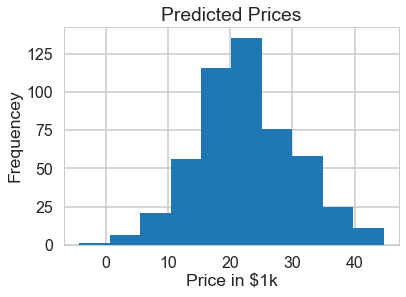

In [65]:
# your turn
plt.hist(lm.predict(X))
plt.title("Predicted Prices")
plt.xlabel("Price in $1k")
plt.ylabel("Frequencey")
plt.show()

#### Exercise 1:

The distribution of the predicted prices is normally distributed between 0 to 40k, and the mean is around 20k. There aren't any outliers.

Text(0.5,1,'Relationship between Predicted and True Price')

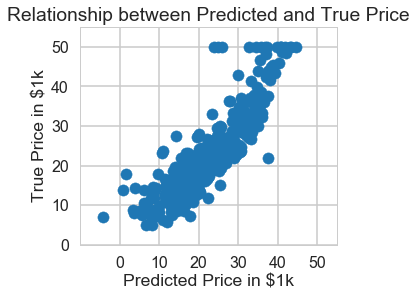

In [81]:
plt.scatter(lm.predict(X), bos.PRICE)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-10, 55)
plt.ylim(0, 55)
plt.xticks(np.arange(0, 55, step=10))
plt.xlabel("Predicted Price in $1k")
plt.ylabel("True Price in $1k")
plt.title("Relationship between Predicted and True Price")

#### Exercise 2:

The scatter plot is identical to the model built with statsmodel since the models are essentially the same and produced the same coefficients.

#### Exercise 3:


Statsmodels uses R-like syntax which can be familiar to R users and statisticians. The formula of regression model for statsmodels is simple. It is written as Y ~ X1 + X2 + ... + Xp. It is also simple to treat categorical and skewed data when using statsmodels. The categorical feature can be treated with C() in the formula and we can simply take the log of the skewed features with np.log(). 

The disadvantage of statsmodels is that it is not quite scalable if the model has large numbers of features. Every independent variables has to be written into the statsmodel formula. On the contrary, sklearn can simply drop the dependent variable from the data frame to fit into the regression model. With sklearn, the features can be normalized simply by the "normalize" parameter in the LinearRegression object.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [102]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149868


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [103]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

8.69056631064e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

## Part 3 Checkup Exercise Set IV
Let's look at the relationship between PTRATIO and housing price.

**Exercise:**
Make a scatterplot of PTRATIO and housing price. Tell a story about the relationship between the variables.

**Exercise:**
Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.

**Exercise:**
Calculate (or extract) the R-squared value. What does it tell you?

**Exercise:**
Compute the  F-statistic. What does it tell you?

**Exercise:**
Take a close look at the F-statistic and the t-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in simple linear regression models.

Text(0.5,1,'Relationship between PTRATIO and Price')

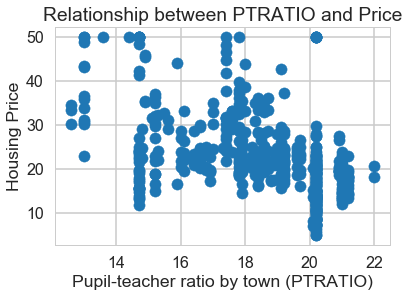

In [104]:
# your turn
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

#### Exercise 1:

The same scatterplot has been constructed previously in part 2 exercise set 1.

The relationship between pupil-teacher ratio and housing price is not visibly obvious. Majority of houses with PT ratio above 20 have median housing price below 30k. Whereas a large portion of data points with median housing price above 30k have PT ratio below 18. The relationship is somewhat linear. We can see there is an outlier with PT ratio about 20 and median housing price around 50k.

In [105]:
m_ptratio = ols('PRICE ~ PTRATIO',bos).fit()
print(m_ptratio.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 30 Mar 2018   Prob (F-statistic):           1.61e-34
Time:                        14:49:49   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

#### Exercise 2:

The coefficient of PT ratio in this OLS regression model is -2.16, which the negative relationship is consistent with the visualization of the data. In this case, the intercept of 62.34 is irrelevant for interpretation, since we are not interested to evaluate housing price with 0 student to pupil ratio of the area.

#### Exercise 3:

The R-squared value shown in the summary is 0.258. The value of R-squared range from 0 to 1, 0 for no relationship between dependent and independent variables to 1 being absolute linear relationship between the two. In this case, the R-squared value describes a weak relationship between PT ratio and housing price with a lot of variance.

In [109]:
N = 506
K = 1
r_sq = 0.258
F_stat = (r_sq/(1-r_sq))*((N-K-1)/K)
F_stat

175.24528301886792

#### Exercise 4:

The calculated F-stat is close to the provided F-stat in the summary (175.1). The p-value of the F-test is nearly 0, which means the model is statistically significant.

#### Exercise 5:


## Part 3 Checkup Exercise Set V
Fit a linear regression model using three independent variables
'CRIM' (per capita crime rate by town)
'RM' (average number of rooms per dwelling)
'PTRATIO' (pupil-teacher ratio by town)

**Exercise:**
Compute or extract the F-statistic. What does it tell you about the model?

**Exercise:**
Compute or extract the R-squared statistic. What does it tell you about the model?

**Exercise:**
Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.

In [163]:
# your turn
m_CRP = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m_CRP.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           1.09e-97
Time:                        00:10:15   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

#### Exercise 1:

The p-value, shown in the summary as Prob(F-statistic) is virtually 0. This means that the linear regression model is statistically significant.

#### Exercise 2:

The R-squared of the model is only 0.593, which mean the model is not very good at predicting house price.

#### Exercise 3:

All of the variables have coefficients with p-values that are virtually 0. However, only the coefficients of RM and PTRATIO are large enough to be significant in predicting house price. The coefficient value of RM as 7.38 means that for each addition room to the house, the house price increases by 7.38k in dollar value on average. And the coefficient value of PTRATIO means that the increase of student-teacher ratio by one would decrease the house price by about 1.07k on average.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{full} - RSS_{reduced}}{K_{full} - K_{reduced}} \right)}{\left( \frac{RSS_{reduced}}{N - K_{reduced}} \right)}$$

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

## Part 4 Checkup Exercises
**Exercise:**
Find another variable (or two) to add to the model we built in Part 3. Compute the F-test comparing the two models as well as the AIC. Which model is better?

In [111]:
m_CNRDP = ols('PRICE ~ CRIM + NOX + RM + DIS + PTRATIO',bos).fit()
print(m_CNRDP.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     175.8
Date:                Fri, 30 Mar 2018   Prob (F-statistic):          1.10e-107
Time:                        17:16:38   Log-Likelihood:                -1583.6
No. Observations:                 506   AIC:                             3179.
Df Residuals:                     500   BIC:                             3205.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.7738      5.033      4.326      0.0

In [113]:
#import anova from from statsmodels and calculate the F test of the two nested models
from statsmodels.stats.anova import anova_lm
anovaResults = anova_lm(m_CRP, m_CNRDP)
print(anovaResults)

   df_resid           ssr  df_diff    ss_diff         F        Pr(>F)
0     502.0  17367.841062      0.0        NaN       NaN           NaN
1     500.0  15489.090562      2.0  1878.7505  30.32377  3.715530e-13


/Users/chinghan75/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/chinghan75/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/chinghan75/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The F-statistics of the two nested model is 30.32 and the p-value is nearly 0, so we can conclude that the two models are statistically different. In comparison of the AICs, the AIC of the full model (3179) is smaller than the AIC of the reduced model (3233). This means that the addition of the two features optimizes the prediction of housing price. 


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

* **Linearity**. The dependent variable Y is a linear combination of the regression coefficients and the independent variables X. This can be verified with a scatterplot of each X vs. Y and plotting correlations among X. 

* **Nonlinearity.** can sometimes be resolved by transforming one or more independent variables, the dependent variable, or both. In other cases, a generalized linear model or a nonlinear model may be warranted.

* **Constant standard deviation**. The SD of the dependent variable Y should be constant for different values of X. We can check this by plotting each X against Y and verifying that there is no "funnel" shape showing data points fanning out as X increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), robust standard errors, or variance stabilizing transformations.
* Normal distribution for errors. The ϵ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.

ϵi∼N(0,σ2)
 
Sometimes the distributions of responses Y may not be normally distributed at any given value of X. e.g. skewed positively or negatively.

* **Independent errors.** The observations are assumed to be obtained independently.
    * e.g. Observations across time may be correlated

There are some other issues that are important investigate with linear regression models.

* **Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
* **Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.


## Part 5 Checkup Exercises
Take the reduced model from Part 3 to answer the following exercises. Take a look at this blog post for more information on using statsmodels to construct these plots.

**Exercise:** Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

**Exercise:** Construct a quantile plot of the residuals. What does the plot tell you?

**Exercise:** What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

**Exercise:** Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

**Exercise:** Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

**Exercise:** Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

Text(0.5,1,'Relationship Between Fitted Values and Residuals')

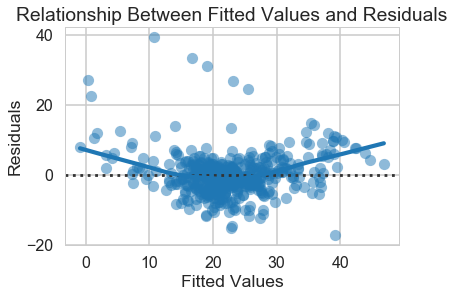

In [145]:
# Your turn.
#create residuals from the reduced model
model_residuals = m_CRP.resid

model_norm_residuals = m_CRP.get_influence().resid_studentized_internal

#plt.scatter(m_CRP.fittedvalues, model_norm_residuals)
sns.residplot(m_CRP.fittedvalues, bos.PRICE, lowess=True, scatter_kws={'alpha': 0.5}) 
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Relationship Between Fitted Values and Residuals")

#### Exercise 1:

Most of the data points are spread out along the x-axis in a curve. There are some outliers with exceedingly high residuals. The plot also shows that most of the outliers with high residuals are below the average of fitted values. We can tell that the requirement of constant standard deviation is hold true for this model.

Text(0,0.5,'Standardized Residuals')

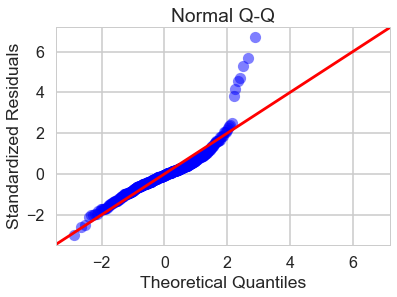

In [133]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')
#sm.qqplot(model_residuals)

#### Exercise 2:

The quantile plot shows the distribution of residuals are mostly normally distributed with outliers on the higher end of the plot. The model has met requirement of normally distributed error with some outliers with abnormally high residual.

#### Exercise 3:

The advantage of fitted vs. residual plot is that we can visualize the predicted value of outliers and inconsistency of variance throughout different predicted values. The disadvantage is that it relies on the Q-Q plot to visualize whether the residuals are normally distributed. Likewise, we rely on fitted vs. residual plot to interpret the data points that fall outside of the normal distribution line on the Q-Q plot.

#### Exercise 4:

The outliers are predicted prices with high residuals, which means they are undervalued by the model. The undervalued prediction are mostly below the average predicted price of 20k.

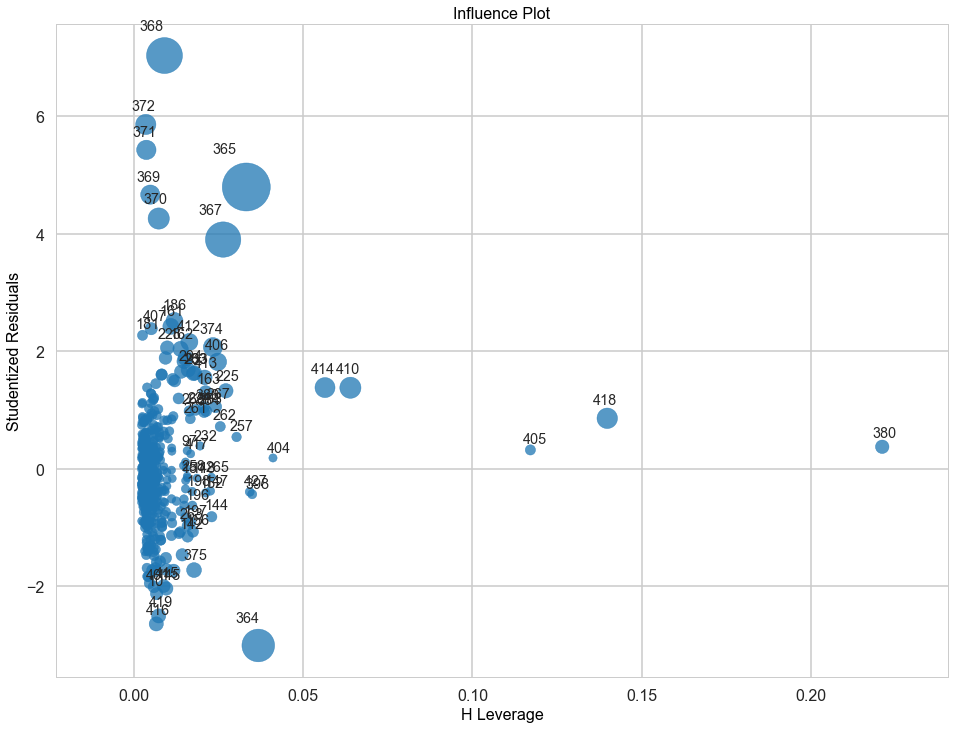

In [156]:
fig, ax = plt.subplots(figsize=(16,12))
fig = sm.graphics.influence_plot(m_CRP, ax=ax, criterion="cooks")

#### Exercise 5:

The plot also shows the outliers from the Q-Q plot as outliers beyond studentized residual value of 3. There also three high influence points above 0.1. These influence points could possibly distort the R-squared value.

#### Exercise 6:

In this exercise, we are removing the outliers (row 365, 367, 368, 369, 370, 371, and 372) and high influence points (380, 405, and 418).

In [165]:
bos_new = bos.drop([365, 367, 368, 369, 370, 371, 372, 380, 405, 418])

m_CRP_new = ols('PRICE ~ CRIM + RM + PTRATIO',bos_new).fit()
print(m_CRP_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     412.0
Date:                Sat, 31 Mar 2018   Prob (F-statistic):          9.12e-134
Time:                        00:11:12   Log-Likelihood:                -1469.9
No. Observations:                 496   AIC:                             2948.
Df Residuals:                     492   BIC:                             2965.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9837      3.301     -1.813      0.0

Text(0,0.5,'Standardized Residuals')

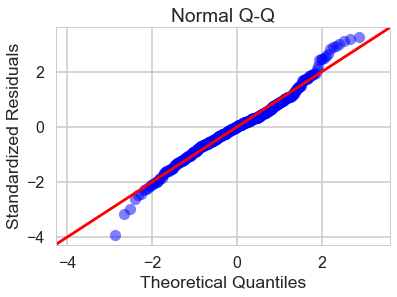

In [166]:
model_new_norm_residuals = m_CRP_new.get_influence().resid_studentized_internal
QQ_new = ProbPlot(model_new_norm_residuals)
plot_lm_2 = QQ_new.qqplot(line='45', alpha=0.5)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

After removing the outliers and high influence points, the model performances even better. The R-squared value is now 0.715 and AIC at 2948 is even lower than the two previous models. The Q-Q plot of the new model shows the residuals are close to normal distribution.